<a href="https://colab.research.google.com/github/sarahajbane/colab_workbook_templates/blob/main/Visual_Exploration_210125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Visual Exploration**

# Pandas Built-in Data Visualization

In this lecture we will learn about pandas built-in capabilities for data visualization! It's built-off of matplotlib, but it baked into pandas for easier usage!  

Let's take a look!

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from IPython.core.display import display, HTML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## The Data


In [ ]:
sales_data=pd.read_csv('/content/drive/MyDrive/Datasets/w3d2customer_sales_data.csv')

In [ ]:
sales_data.head()

,CustomerID,Date,ProductID,Quantity,UnitPrice,SalesAmount,CustomerRegion
0,C001,1/15/2024,P001,2,20,40,North
1,C002,1/18/2024,P002,1,25,25,East
2,C003,1/20/2024,P001,3,20,60,South
3,C001,1/25/2024,P003,1,100,100,North
4,C004,1/26/2024,P002,2,25,50,West


## Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area [ df.plot(kind='area',x=   ,y=) ]
* df.plot.bar    [ df.plot(kind='bar',x=   ,y=) ]
* df.plot.density  
* df.plot.hist    
* df.plot.line    
* df.plot.scatter     
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)

## Area

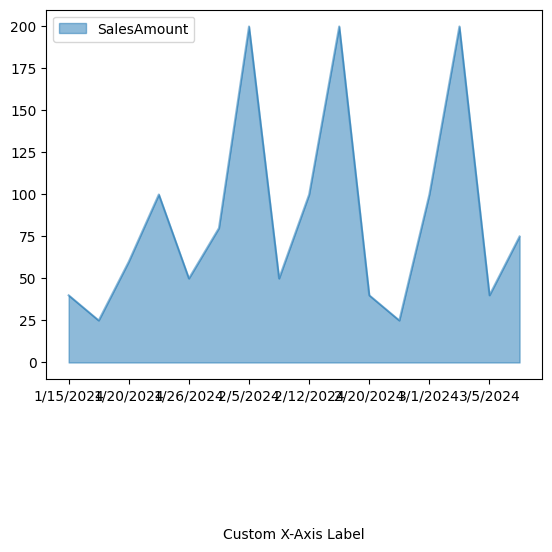

In [ ]:
# Creating an area plot to visualize the sales data over time.
# The x-axis represents the 'Date' column, and the y-axis represents the 'SalesAmount'.
# The area is filled with a transparency level of 0.4 using the alpha parameter.
ax = sales_data.plot(kind='area',x='Date',y='SalesAmount',alpha=0.5)
ax.set_xlabel("Custom X-Axis Label", labelpad=90)  # Increase labelpad to shift it down
plt.show()

## Barplots

In [ ]:
samle_by_region=sales_data.groupby('CustomerRegion')['SalesAmount'].sum()

<Axes: xlabel='CustomerRegion'>

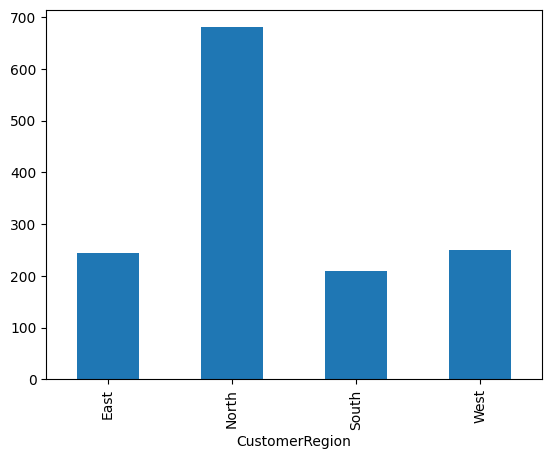

In [ ]:
samle_by_region.plot.bar()

## Histograms

<Axes: ylabel='Frequency'>

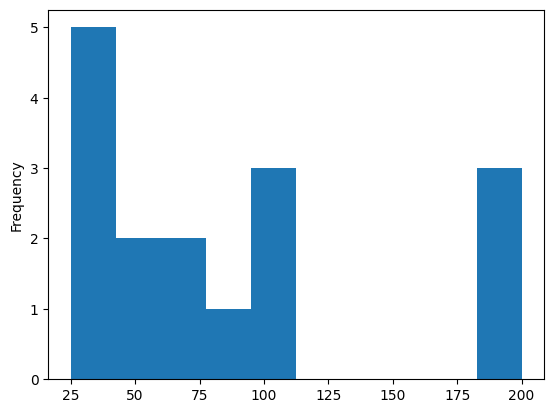

In [ ]:
sales_data['SalesAmount'].plot.hist(bins=10)

## Line Plots

<Axes: xlabel='Date'>

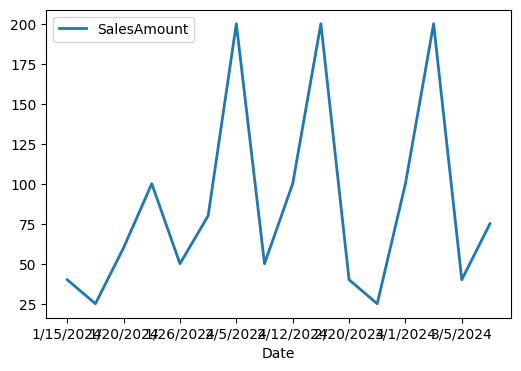

In [ ]:
# Creating a line plot to visualize the sales data over time.
# The x-axis represents the 'Date' column, and the y-axis represents the 'SalesAmount'.
# The plot is customized with a figure size of 6x4 inches and a line width (lw) of 1.
sales_data.plot.line(x='Date',y='SalesAmount',figsize=(6,4),lw=2)

In [ ]:
sales_data

## Scatter Plots

<Axes: xlabel='Quantity', ylabel='SalesAmount'>

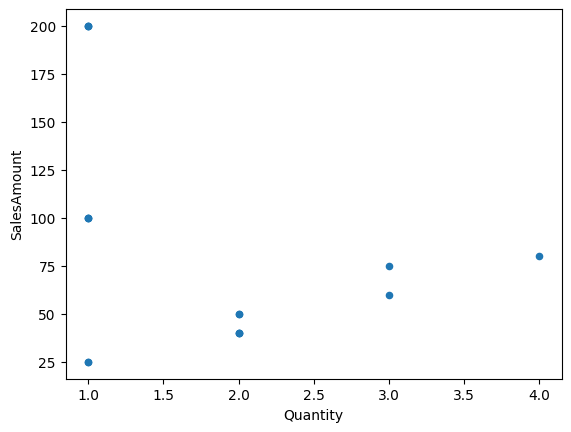

In [ ]:
sales_data.plot.scatter(x='Quantity',y='SalesAmount')

<Axes: xlabel='Quantity', ylabel='SalesAmount'>

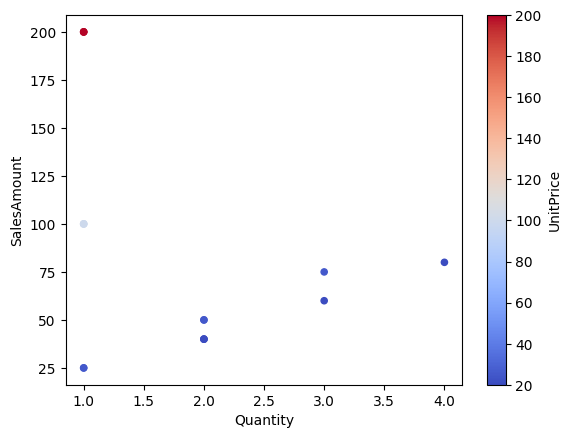

In [ ]:
sales_data.plot.scatter(x='Quantity',y='SalesAmount',c='UnitPrice',cmap='coolwarm')

## BoxPlots

<Axes: >

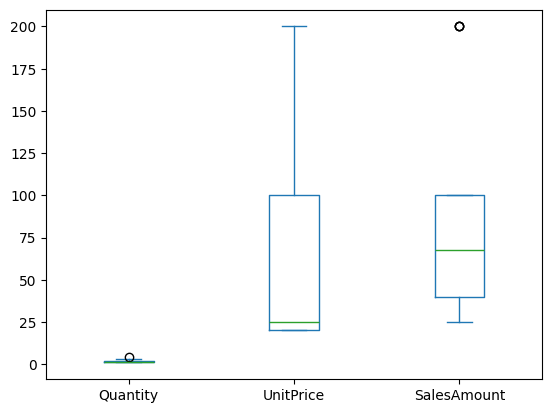

In [ ]:
 # Can also pass a by= argument for groupby
sales_data.plot.box()

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

<Axes: xlabel='a', ylabel='b'>

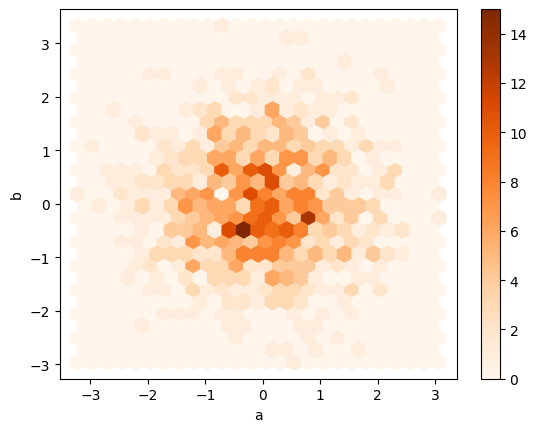

In [ ]:
# Creating a hexbin plot to visualize the relationship between columns 'a' and 'b' in the DataFrame.
# The 'gridsize' parameter controls the number of hexagons in the plot, and the 'cmap' parameter sets the color scheme to 'Oranges'.
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

## Kernel Density Estimation plot (KDE)

<Axes: ylabel='Density'>

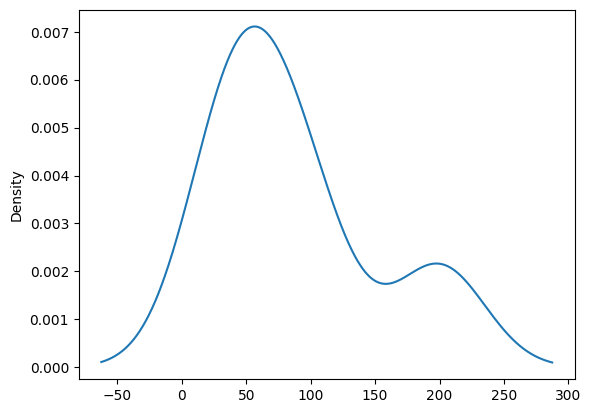

In [ ]:
sales_data['SalesAmount'].plot.kde()

#Matplotlib

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures.

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

Import the `matplotlib.pyplot` module under the name `plt`

In [ ]:
import matplotlib.pyplot as plt

## Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

In [ ]:
# Generating a range of values for x from 0 to 5 with 11 equally spaced points using numpy's linspace function.
# Creating a corresponding y array where each value in y is the square of the corresponding value in x.
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [ ]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

We can create a very simple line plot using the following

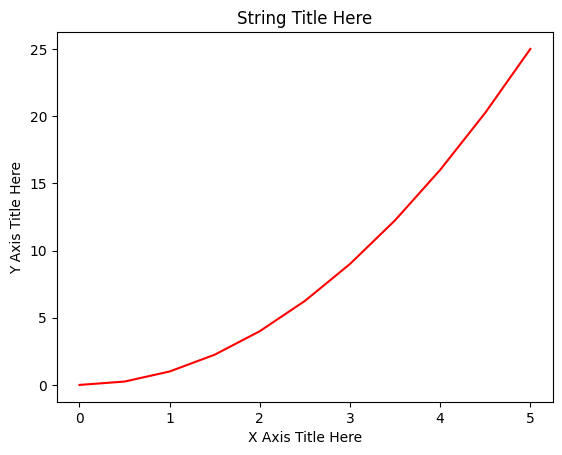

In [ ]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

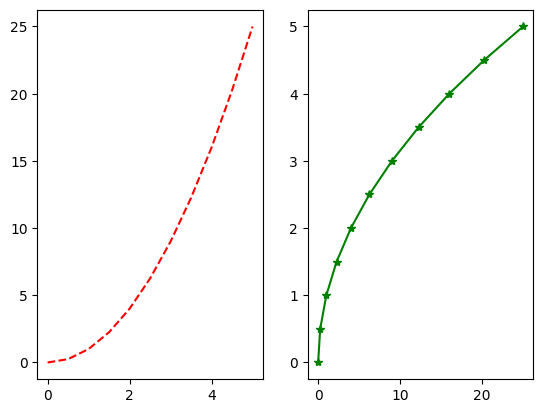

In [ ]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')

# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it.

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

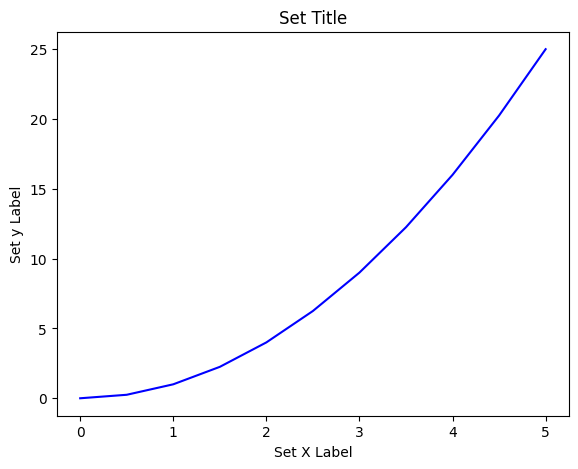

In [ ]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

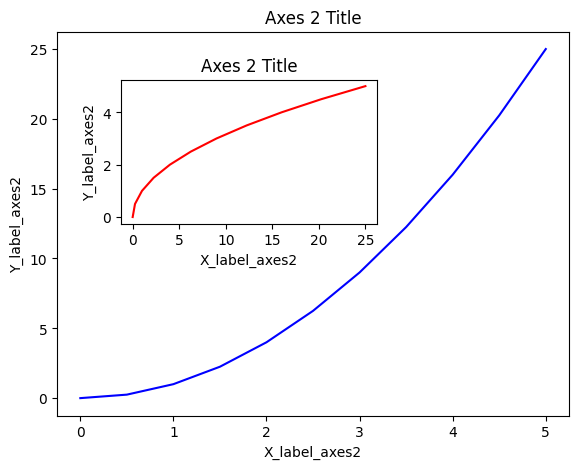

In [ ]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

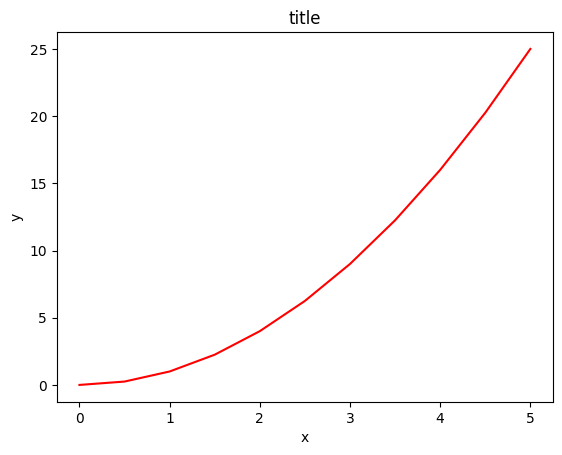

In [ ]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

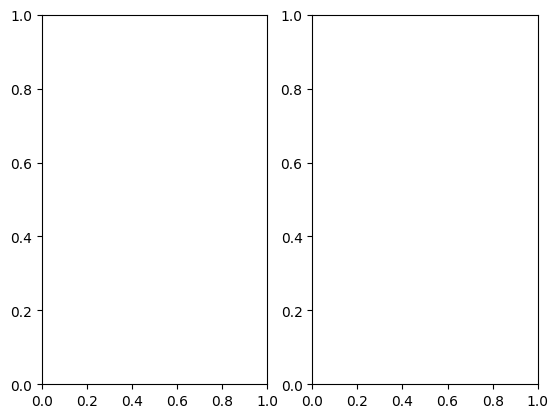

In [ ]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [ ]:
# Axes is an array of axes to plot on
axes

array([<Axes: >, <Axes: >], dtype=object)

We can iterate through this array:

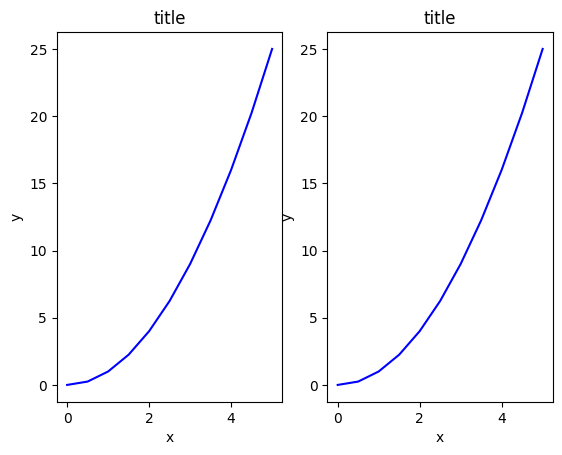

In [ ]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

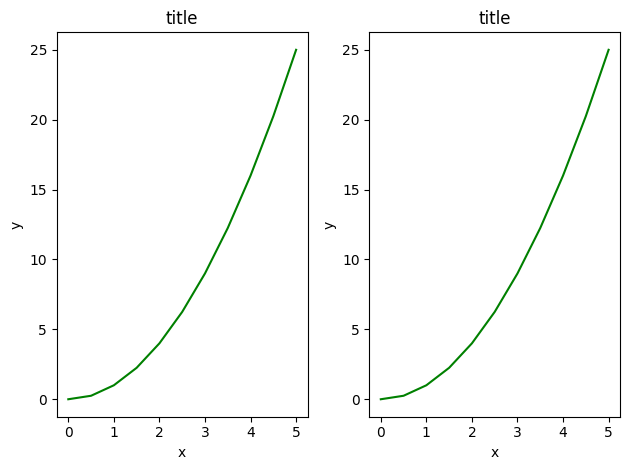

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments.
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch).

For example:

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

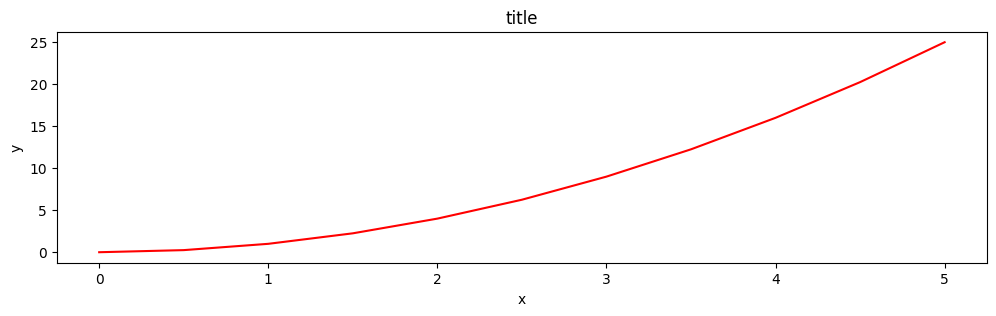

In [ ]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [ ]:
ax.set_title("title")

Text(0.5, 1.0, 'title')

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(294.5454545454545, 0.5, 'y')

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure:

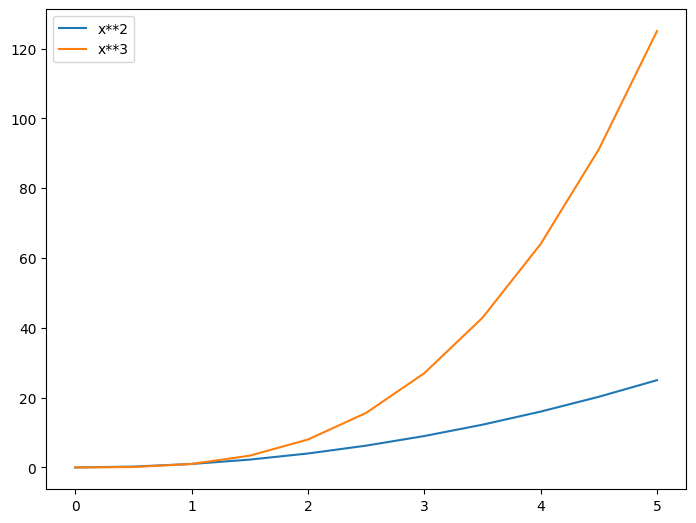

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

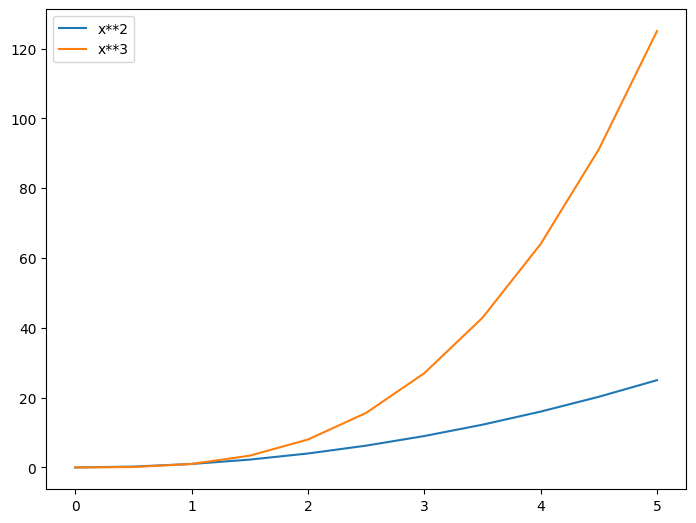

In [ ]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes.

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

##colors with Matlab like sysntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

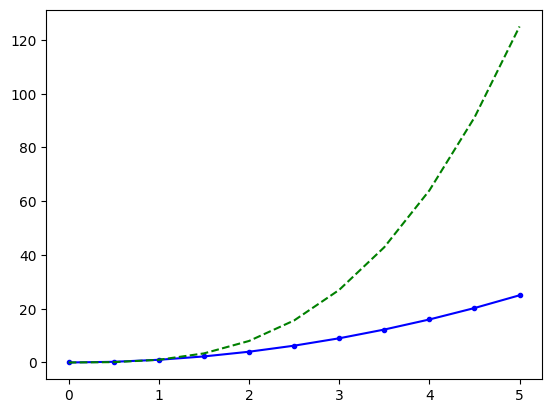

In [ ]:
# MATLAB style line color and style
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter
We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

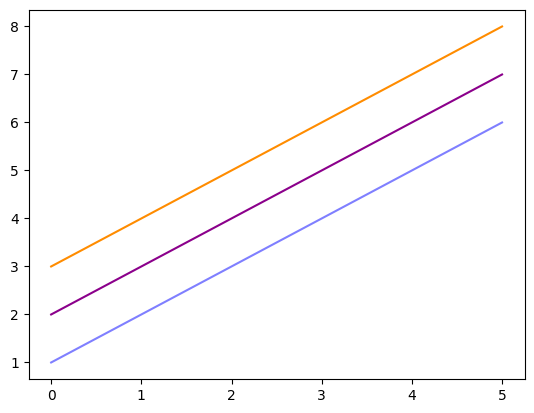

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

#Scatter plot

In [ ]:
plt.scatter(x,y)

#Histogram

In [ ]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

#box plot

In [ ]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);

#Seaborn

##Distribution plots
Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* histplot
* jointplot
* pairplot
* kdeplot

Imports

In [ ]:
import seaborn as sns

## Data
Seaborn comes with built-in data sets!

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

## histplot

The distplot shows the distribution of a univariate set of observations.

In [ ]:
sns.histplot(tips['total_bill'])

In [ ]:
sns.histplot(tips['total_bill'],kde=True)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

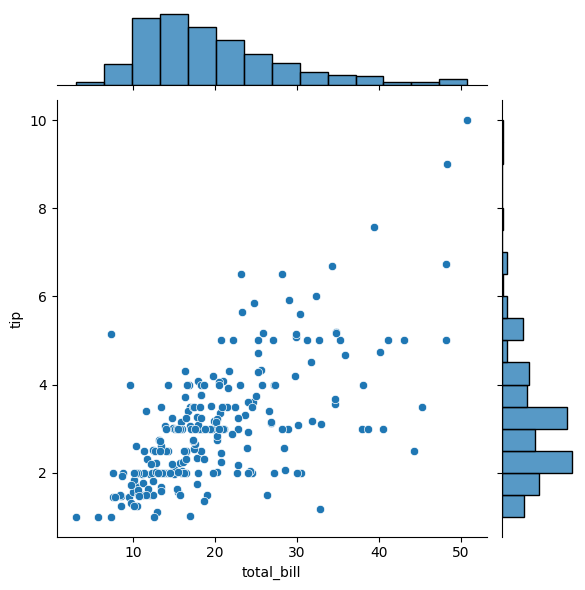

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

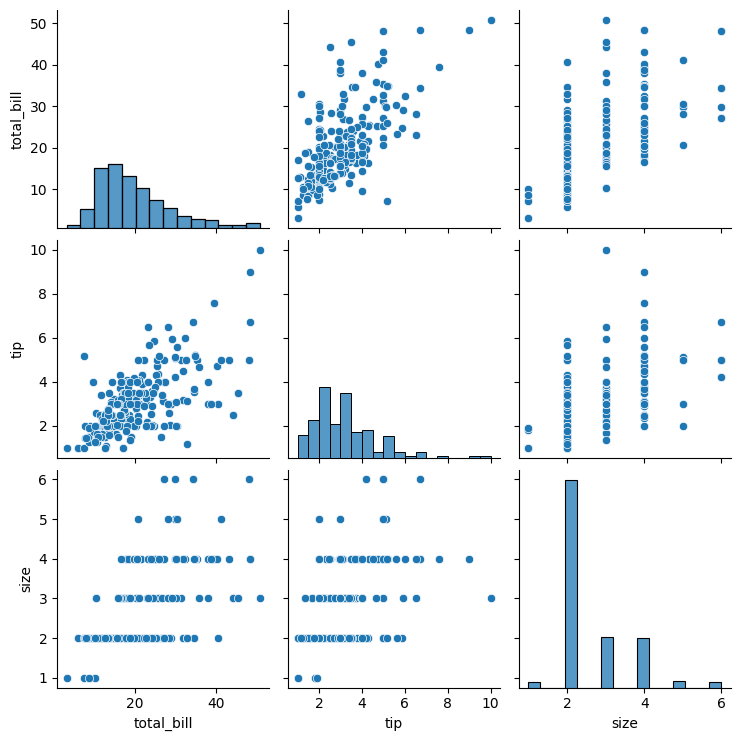

In [ ]:
sns.pairplot(tips)

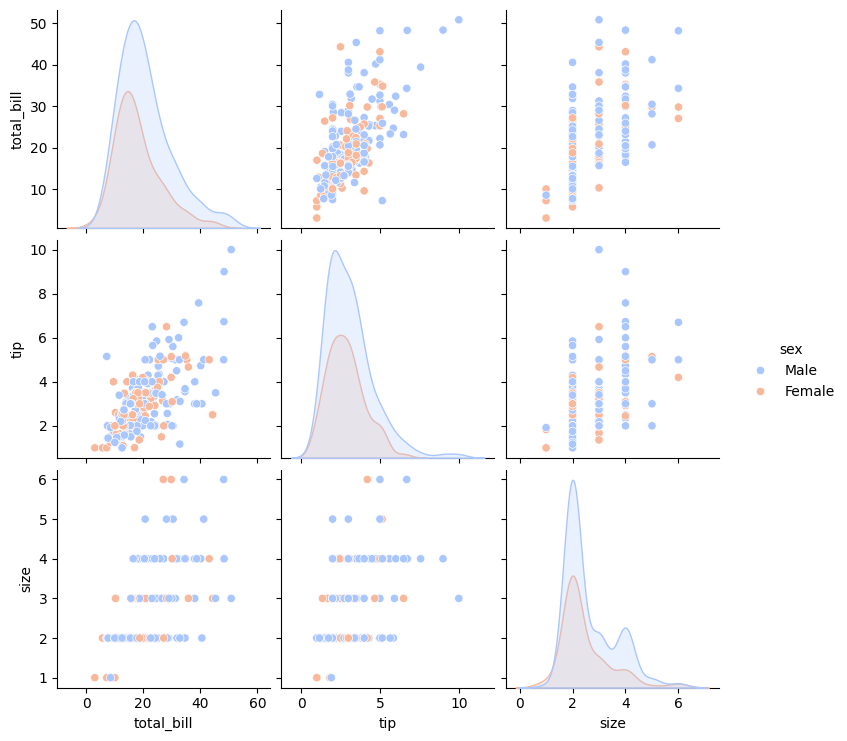

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

<Axes: xlabel='total_bill', ylabel='Density'>

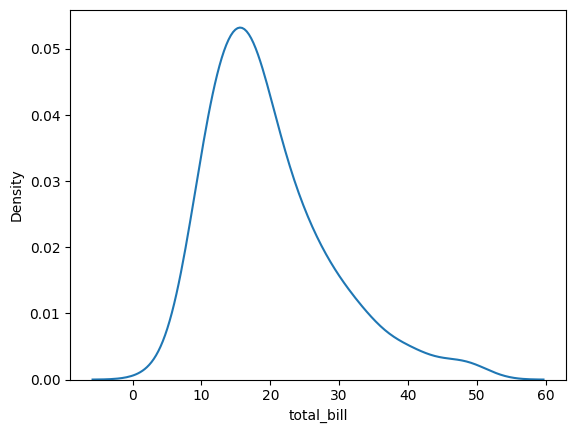

In [ ]:
sns.kdeplot(tips['total_bill'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

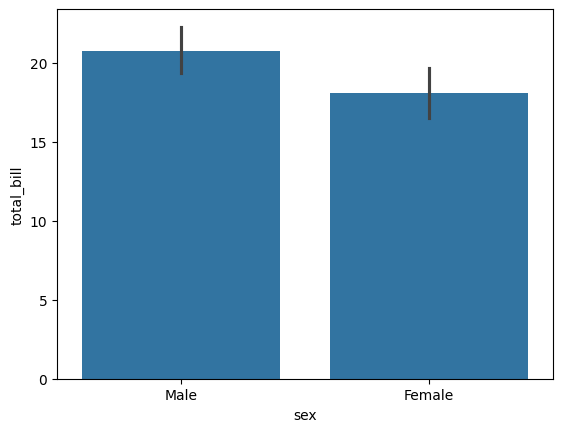

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips)

You can change the estimator object to your own function, that converts a vector to a scalar:

<Axes: xlabel='sex', ylabel='total_bill'>

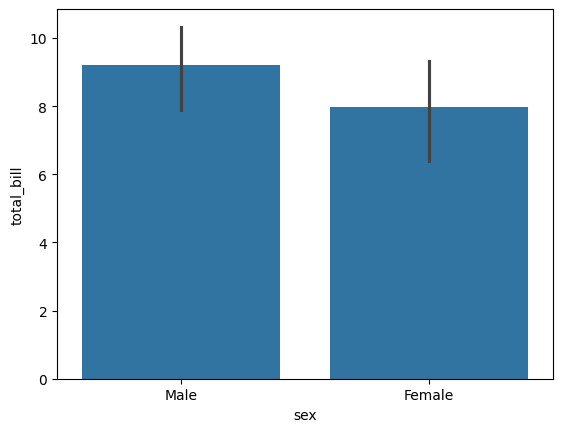

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

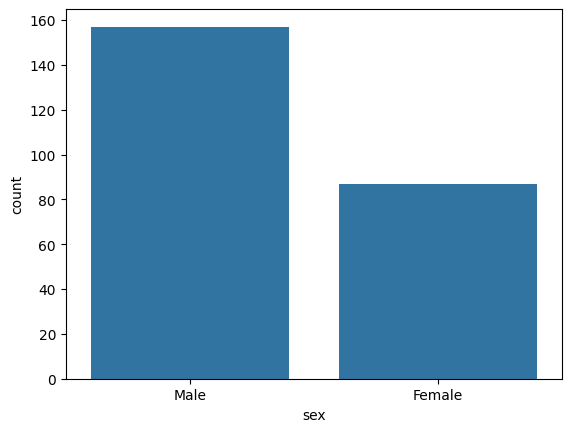

In [ ]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

In [ ]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

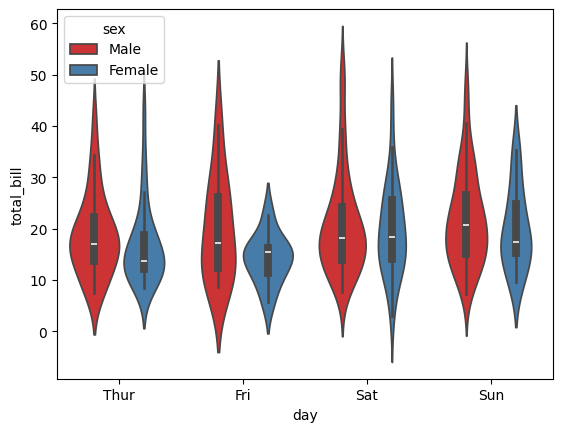

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## swarmplot
The swarmplot will draw a scatterplot where one variable is categorical. A swarmplot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

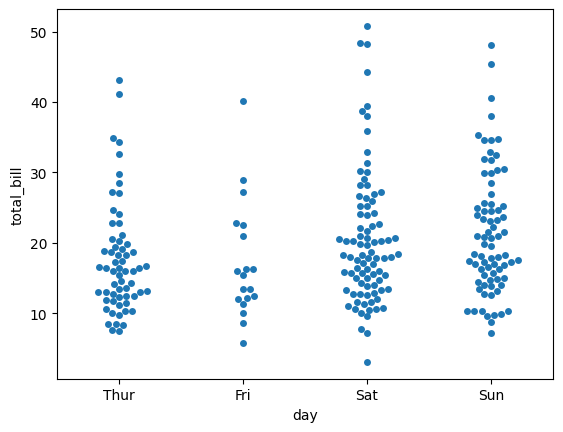

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=tips)

#Scatter plot using seaborn

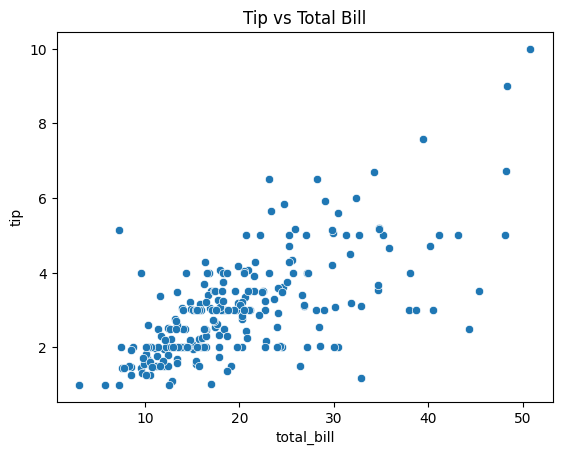

In [ ]:
# Create a scatter plot
sns.scatterplot(data=tips, x="total_bill", y="tip")

# Set the title
plt.title("Tip vs Total Bill")

# Display the plot
plt.show()

**Thank you!**

 **Keep Practicing**

In [ ]:
# Table data
table_data = {
    "Feature": [
        "Primary Use", "Ease of Use", "Supported Data", "Customization",
        "Plot Types", "Default Styling", "Learning Curve", "Performance",
        "Statistical Features", "Common Use Cases", "Case Recommendation"
    ],
    "pandas `.plot()`": [
        "Quick plotting of Series/DataFrames.",
        "Very simple and intuitive for basic plots.",
        "Works directly with pandas Series/DataFrame.",
        "Limited customization (relies on matplotlib under the hood).",
        "Common types like line, bar, scatter, histogram, and boxplot.",
        "Basic styling inherited from matplotlib.",
        "Low – great for beginners and quick EDA.",
        "Efficient for small to medium datasets.",
        "Minimal (e.g., histograms, boxplots).",
        "Quick EDA. Plotting directly from DataFrame/Series.",
        "Beginners exploring data quickly. Interactive notebooks like Jupyter."
    ],
    "matplotlib.pyplot": [
        "Low-level library for creating highly customizable plots.",
        "Requires more boilerplate code for setup (e.g., axes, labels).",
        "Works with arrays, lists, or pandas objects, but needs explicit handling.",
        "Highly customizable; full control over figure, axes, and elements.",
        "Full range of plots, including uncommon ones like quiver, 3D plots, etc.",
        "Requires manual styling to improve appearance (e.g., colors, grids).",
        "Medium – requires knowledge of plotting concepts (axes, figures).",
        "Very efficient but can be verbose for repetitive tasks.",
        "None – purely for data visualization; lacks statistical calculations.",
        "Custom, precise visualizations. Creating publication-quality plots.",
        "Professionals requiring detailed and precise visualizations. High control over plot elements."
    ],
    "seaborn": [
        "High-level library for statistical data visualization.",
        "Simplified for statistical visualizations but requires tidy data format.",
        "Works best with pandas DataFrame in tidy format but can handle arrays/lists.",
        "Moderate customization with a focus on aesthetics and statistical details.",
        "Specialized in statistical plots like violin, swarm, pairplot, and heatmaps.",
        "Attractive, pre-styled plots designed for quick, visually appealing outputs.",
        "Low to medium – intuitive for statistical plots but requires tidy data understanding.",
        "Can be slower for large datasets due to higher-level abstractions.",
        "Designed for statistical data visualization with built-in support for regression, KDE, distributions, and aggregation.",
        "Statistical exploration. Beautiful plots with minimal effort.",
        "Analyzing and visualizing statistical relationships. Polished, visually appealing plots with ease."
    ]
}

# Convert to DataFrame
eda_table = pd.DataFrame(table_data)

# Display table as HTML
display(HTML(eda_table.to_html(escape=False, index=False)))


Feature,pandas `.plot()`,matplotlib.pyplot,seaborn
Primary Use,Quick plotting of Series/DataFrames.,Low-level library for creating highly customizable plots.,High-level library for statistical data visualization.
Ease of Use,Very simple and intuitive for basic plots.,"Requires more boilerplate code for setup (e.g., axes, labels).",Simplified for statistical visualizations but requires tidy data format.
Supported Data,Works directly with pandas Series/DataFrame.,"Works with arrays, lists, or pandas objects, but needs explicit handling.",Works best with pandas DataFrame in tidy format but can handle arrays/lists.
Customization,Limited customization (relies on matplotlib under the hood).,"Highly customizable; full control over figure, axes, and elements.",Moderate customization with a focus on aesthetics and statistical details.
Plot Types,"Common types like line, bar, scatter, histogram, and boxplot.","Full range of plots, including uncommon ones like quiver, 3D plots, etc.","Specialized in statistical plots like violin, swarm, pairplot, and heatmaps."
Default Styling,Basic styling inherited from matplotlib.,"Requires manual styling to improve appearance (e.g., colors, grids).","Attractive, pre-styled plots designed for quick, visually appealing outputs."
Learning Curve,Low – great for beginners and quick EDA.,"Medium – requires knowledge of plotting concepts (axes, figures).",Low to medium – intuitive for statistical plots but requires tidy data understanding.
Performance,Efficient for small to medium datasets.,Very efficient but can be verbose for repetitive tasks.,Can be slower for large datasets due to higher-level abstractions.
Statistical Features,"Minimal (e.g., histograms, boxplots).",None – purely for data visualization; lacks statistical calculations.,"Designed for statistical data visualization with built-in support for regression, KDE, distributions, and aggregation."
Common Use Cases,Quick EDA. Plotting directly from DataFrame/Series.,"Custom, precise visualizations. Creating publication-quality plots.",Statistical exploration. Beautiful plots with minimal effort.
